## 爬虫-链家房价数据  

这个文件用于爬取链家网站上上海市的部分地段的房价数据，包括单价和总价。


In [5]:
#coding=utf-8
import urllib
from urllib import request
import re
import time
import numpy as np
import os

### 爬虫部分  
这一部分首先定义了要爬取的地段的网址信息，这些信息需要自己去链家的网站上寻找规律并记录下来。随后通过正则表达式匹配分别找到每平米的单价和总价并记录在一个列表中。


In [2]:
metrostops={
    'minhang kaifaqu':'li143685060s100021907',
    'wenjing road':'li143685060s100021908',
    'huaning road':'li143685060s100021909',
    'jinping road':'li143685060s100021910',
    'dongchuan road':'li143685060s100021911',
    'jianchuan road':'li143685060s100021912',
    'beiqiao':'li143685060s100021913',
    'zhuanqiao':'li143685060s100021914',
    'yindu road':'li143685060s100021915',
    'chunshen road':'li143685060s100021916', 
    'xinzhuang':'li143685060s100021837'
}

headers={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 BIDUBrowser/8.7 Safari/537.36'
 
}
url='https://sh.lianjia.com/ditiefang/li143685060s100021913/'

def get_data(url):
    request = urllib.request.Request(url, headers = headers)
    response = urllib.request.urlopen(request)
    text = response.read().decode('utf-8')
    s1 = r'data-price="[0-9]+">'
    s2 = r'"totalPrice"><span>[0-9]+</span>'
    pattern1 = re.compile(s1, re.I)
    pattern2 = re.compile(s2, re.I)

    def find_number(s):
        s_re = r'[0-9]+'
        ans = re.search(s_re,s).group()
        return int(ans)
    price = list(map(find_number,pattern1.findall(text)))
    total_price = list(map(find_number,pattern2.findall(text)))
    return price,total_price

localtime = time.asctime( time.localtime(time.time()) )
file_name = localtime.split()[1]+localtime.split()[2]
file = open(r'C:\Users\Jiadong WANG\Desktop\tmp_Lianjia\Crawler-Toy\{}.txt'.format(file_name),mode='w')

for metrostop in metrostops.keys():
    file.write(metrostop+'\n')
    price =list()
    total_price=list()
    for page in range(1,5):
        if page==0:
            url = r'https://sh.lianjia.com/ditiefang/{}/'.format(metrostops[metrostop])
        else:
            url = r'https://sh.lianjia.com/ditiefang/{}/pg{}'.format(metrostops[metrostop],page)
        price0,total_price0 = get_data(url)
        price.extend(price0)
        total_price.extend(total_price0)
    file.write(str(price)+'\n')
    file.write(str(total_price)+'\n')

file.close()

### 数据处理部分
这一部分主要做一些数据分析、处理和可视化工作。

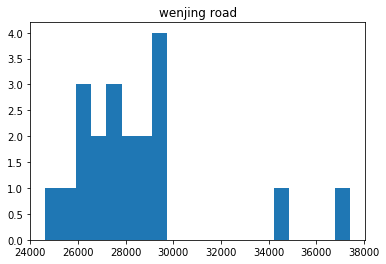

Around wenjing road:
   average price is  28456.35
   minimum price is  24630
   maximum price is  37411


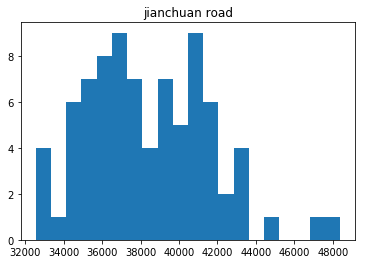

Around jianchuan road:
   average price is  38435.0487805
   minimum price is  32546
   maximum price is  48388


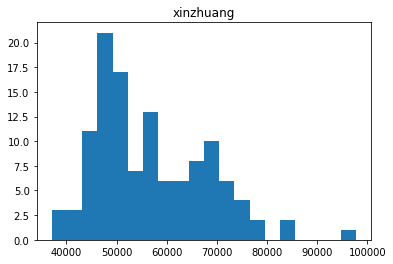

Around xinzhuang:
   average price is  56768.8916667
   minimum price is  37068
   maximum price is  97793


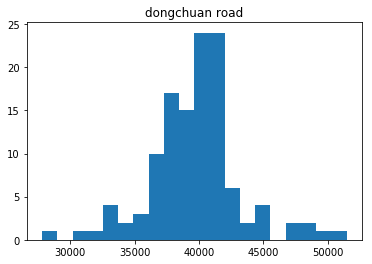

Around dongchuan road:
   average price is  39790.7166667
   minimum price is  27836
   maximum price is  51444


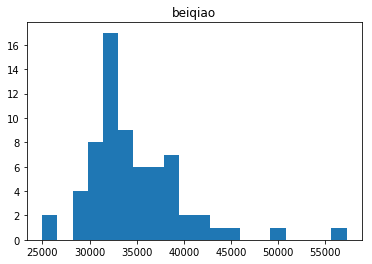

Around beiqiao:
   average price is  34746.1343284
   minimum price is  24967
   maximum price is  57269


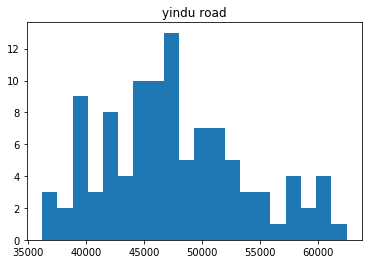

Around yindu road:
   average price is  47591.2788462
   minimum price is  36221
   maximum price is  62465


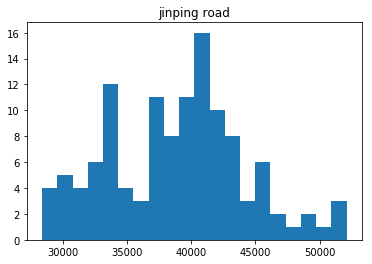

Around jinping road:
   average price is  38856.0083333
   minimum price is  28356
   maximum price is  52106


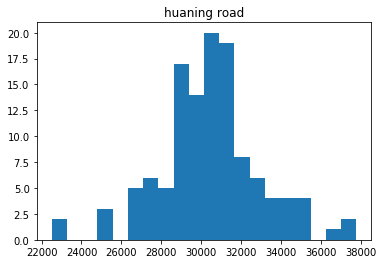

Around huaning road:
   average price is  30474.6333333
   minimum price is  22512
   maximum price is  37776


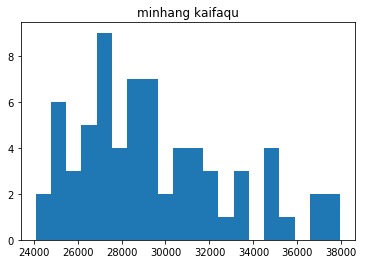

Around minhang kaifaqu:
   average price is  29489.7391304
   minimum price is  24101
   maximum price is  37944


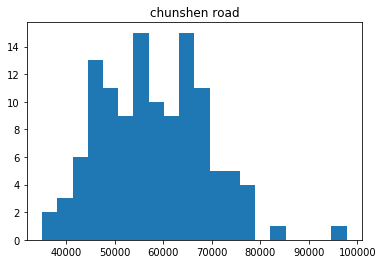

Around chunshen road:
   average price is  58003.4416667
   minimum price is  35030
   maximum price is  97793


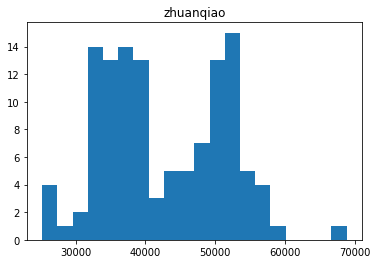

Around zhuanqiao:
   average price is  42540.55
   minimum price is  25207
   maximum price is  68833


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

data=dict()

with open(r'C:\Users\Jiadong WANG\Desktop\tmp_Lianjia\Crawler-Toy\{}.txt'.format(file_name)) as file:
    lines=list(file)
    n = int(len(lines)/3)
    place = []
    price_all = []
    total_price_all = []
    for i in range(n):
        price = list(map(int,lines[3*i+1].rstrip(']\n').lstrip('[').split(',')))
        total_price = list(map(int,lines[3*i+2].rstrip(']\n').lstrip('[').split(',')))
        price_all.extend(price)
        total_price_all.extend(total_price)
        place.append(lines[3*i].strip('\n'))
        data[lines[3*i].strip('\n')]=[price,total_price]


ave_by_stop=[]
min_by_stop=[]
max_by_stop=[]
dev_by_stop=[]
for i in range(n):
    plt.figure(i)
    plt.hist(data[place[i]][0],bins=20,histtype='bar')
    plt.title(place[i])
    plt.show()
    tmp = np.array(data[place[i]][0])
    print('Around '+ place[i] +':')
    print('   average price is ', np.average(tmp))
    print('   minimum price is ', np.min(tmp))
    print('   maximum price is ', np.max(tmp))
    ave_by_stop.append(np.average(tmp))
    min_by_stop.append(np.min(tmp))
    max_by_stop.append(np.max(tmp))
    dev_by_stop.append(np.sqrt(np.var(tmp)))



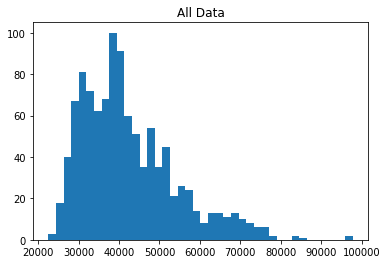

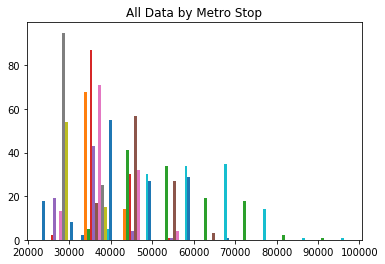

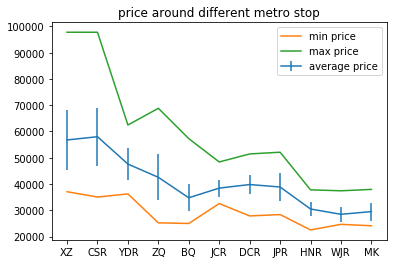

In [4]:
plt.figure(n+1)
plt.hist(price_all,bins=40,histtype='bar')
plt.title('All Data')
plt.show()

plt.figure(n+2)
plt.hist([data[place[i]][0] for i in range(n)],bins=8,histtype='bar')
plt.title('All Data by Metro Stop')
plt.show()

#Sort the data on distance to center of Shanghai
#闵行开发区文井路华宁路金平路东川路剑川路北桥颛桥银都路春申路莘庄
order = ['xinzhuang','chunshen road','yindu road','zhuanqiao','beiqiao','jianchuan road','dongchuan road','jinping road','huaning road','wenjing road','minhang kaifaqu']
order_brief=['XZ','CSR','YDR','ZQ','BQ','JCR','DCR','JPR','HNR','WJR','MK']

order_number = []
for i in range(len(order)):
    for j in range(len(place)):
        if place[j]==order[i]:
            order_number.append(j)
def put_in_new_order(my_list):
    tmp=[my_list[order_number[i]] for i in range(len(my_list))]
    return tmp

ordered_dev_by_stop = put_in_new_order(dev_by_stop)
ordered_min_by_stop = put_in_new_order(min_by_stop)
ordered_max_by_stop = put_in_new_order(max_by_stop)
ordered_ave_by_stop = put_in_new_order(ave_by_stop)

plt.figure(n+3)
plt.errorbar(order_brief,ordered_ave_by_stop,yerr=ordered_dev_by_stop,label='average price')
plt.plot(order_brief,ordered_min_by_stop,label='min price')
plt.plot(order_brief,ordered_max_by_stop,label='max price')
plt.title('price around different metro stop')
plt.legend()
plt.show()

### 随时间变化趋势  


Jun17
165 169
[42406.837760910814, 42137.92613636364, 42257.845365733607, 42377.764595103581]
['Jun14', 'Jun15', 'Jun16', 'Jun17']


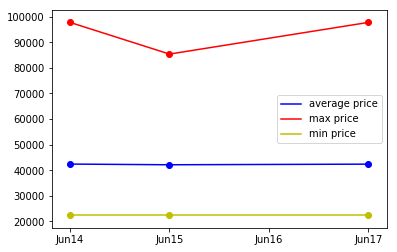

In [60]:
month = {'Jan':[1,31],'Feb':[2,28],'Mar':[3,31],'Apr':[4,30],
        'May':[5,31],'Jun':[6,30],'Jul':[7,31],'Aug':[8,31],
        'Sep':[9,30],'Oct':[10,31],'Nov':[11,30],'Dec':[12,31],
        1:'Jan',2:'Feb',3:'Mar',4:'Apr',
        5:'May',6:'Jun',7:'Jul',8:'Aug',
        9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

first_date = 'Jun14'
localtime = time.asctime( time.localtime(time.time()) )
today_date = localtime.split()[1]+localtime.split()[2]
print(today_date)

def date_to_number(date):
    m=date[0:3]
    ans=0
    for i in range(1,month[m][0]):
        ans+=month[month[i]][1]
    ans+=int(date[3:])
    return ans

def number_to_date(num):
    for i in range(1,13):
        if num<=month[month[i]][1]:
            return month[i]+str(num)
        num=num-month[month[i]][1]

        
ave_by_date= []
min_by_date= []
max_by_date= []
dev_by_date= []
date = []

print(date_to_number(first_date),date_to_number(today_date)+1)
for i in range(date_to_number(first_date),date_to_number(today_date)+1):
    file_name = number_to_date(i)
    if os.path.exists(r'.\{}.txt'.format(file_name)):
        with open(r'.\{}.txt'.format(file_name)) as file:
            lines=list(file)
            n = int(len(lines)/3)
            place = []
            price_all = []
            total_price_all = []
            for j in range(n):
                price = list(map(int,lines[3*j+1].rstrip(']\n').lstrip('[').split(',')))
                total_price = list(map(int,lines[3*j+2].rstrip(']\n').lstrip('[').split(',')))
                price_all.extend(price)
                total_price_all.extend(total_price)
            ave_by_date.append(np.average(price_all))
            min_by_date.append(np.min(price_all))
            max_by_date.append(np.max(price_all))
            dev_by_date.append(np.sqrt(np.var(price_all)))
    else:
        ave_by_date.append(0)
        min_by_date.append(0)
        max_by_date.append(0)     
        dev_by_date.append(0)
    date.append(number_to_date(i))

# interpolate 0s
ave_by_date_real = ave_by_date.copy()
min_by_date_real = min_by_date.copy()
max_by_date_real = max_by_date.copy()
date_real = date.copy()
for i in range(0,len(ave_by_date)):
    if ave_by_date[i]!=0:
        a = i
        continue
    else:
        j=i+1
        while ave_by_date[j]==0:
            j=j+1
        ave_by_date[i]=ave_by_date[a]+(ave_by_date[j]-ave_by_date[a])*(i-a)/(j-a)
        min_by_date[i]=min_by_date[a]+(min_by_date[j]-min_by_date[a])*(i-a)/(j-a)
        max_by_date[i]=max_by_date[a]+(max_by_date[j]-max_by_date[a])*(i-a)/(j-a)
        dev_by_date[i]=dev_by_date[a]+(dev_by_date[j]-dev_by_date[a])*(i-a)/(j-a)
        
i=0
while i<len(ave_by_date_real):
    if ave_by_date_real[i]==0:
        del ave_by_date_real[i]
        del min_by_date_real[i]
        del max_by_date_real[i]
        del date_real[i]
    i+=1

print(ave_by_date)
print(date)

plt.figure()
plt.errorbar(date,ave_by_date,yerr=label='average price',color='b')

plt.scatter(date_real,ave_by_date_real,color='b')
plt.plot(date,max_by_date,label='max price',color='r')
plt.scatter(date_real,max_by_date_real,color='r')
plt.plot(date,min_by_date,label='min price',color='y')
plt.scatter(date_real,min_by_date_real,color='y')
plt.legend()
plt.show()